# HR Analytics: Employee Attrition Prediction

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report


### **1. Load and explore Dataset**

In [8]:
df = pd.read_csv("HR_Analytics.csv.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Get the number of rows and columns

In [9]:
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1470
Number of columns: 35



Prints the data types of each column

In [10]:
column_types = df.dtypes

print("Types of columns:")
print(column_types)

Types of columns:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
To

Checking for null values

In [11]:
nulls_exist = df.isnull().any().any()

if nulls_exist:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


Ensure Attrition is categorical (0 or 1)

In [12]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].astype(int)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### **2. Exploratory Data Analysis (EDA)**

Check for missing values

In [13]:
display(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Summary statistics

In [14]:
display(df.describe())

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Descriptive statistics for non-numeric columns

In [15]:
df.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


Visualizing the distribution of target variable

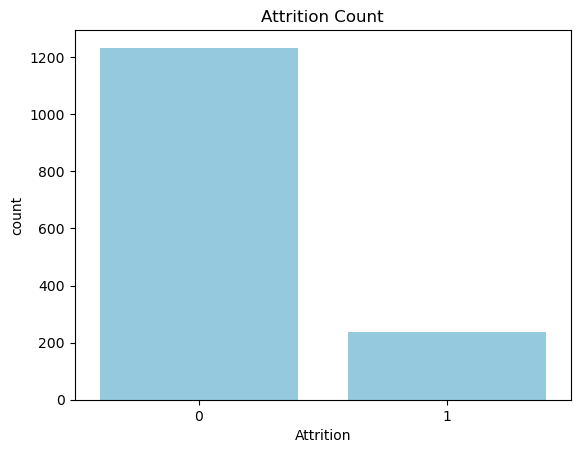

In [16]:
sns.countplot(x=df['Attrition'], color='skyblue')
plt.title("Attrition Count")
plt.show()

Correlation Heatmap

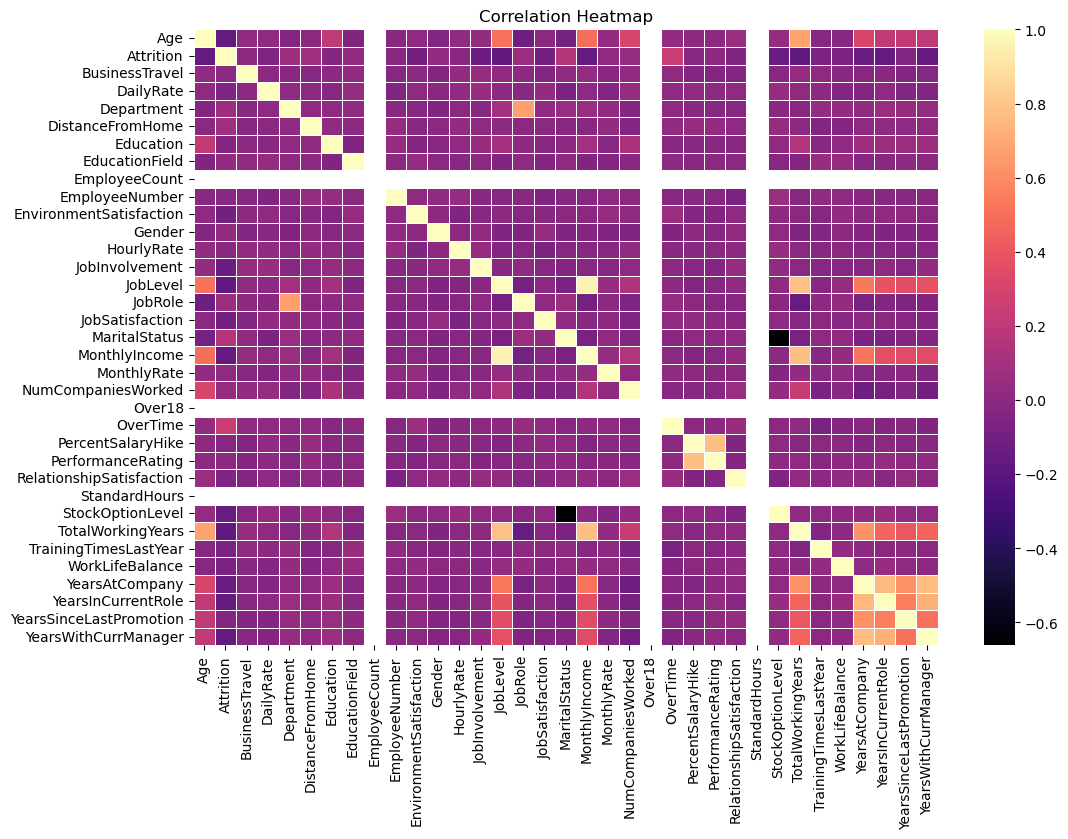

In [17]:
# Convert categorical variables into numeric 
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for potential inverse transformations

# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='magma', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Attrition rate based on Department

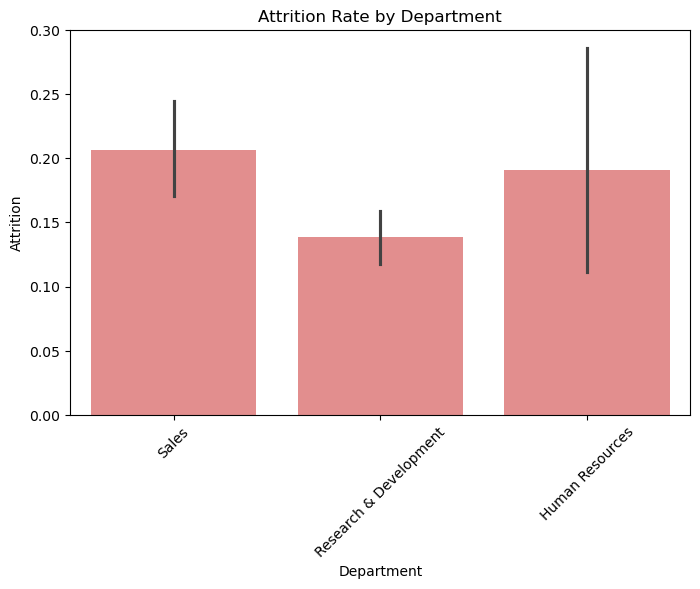

In [18]:
# Reverse mapping for Department column
department_labels = label_encoders['Department'].classes_
department_mapping = {i: label for i, label in enumerate(department_labels)}

# Replace numeric Department values with original names
df['Department'] = df['Department'].map(department_mapping)

plt.figure(figsize=(8, 5))
sns.barplot(x='Department', y='Attrition', data=df, color='lightcoral')
plt.title('Attrition Rate by Department')
plt.xticks(rotation=45)
plt.show()


Monthly Income Distribution

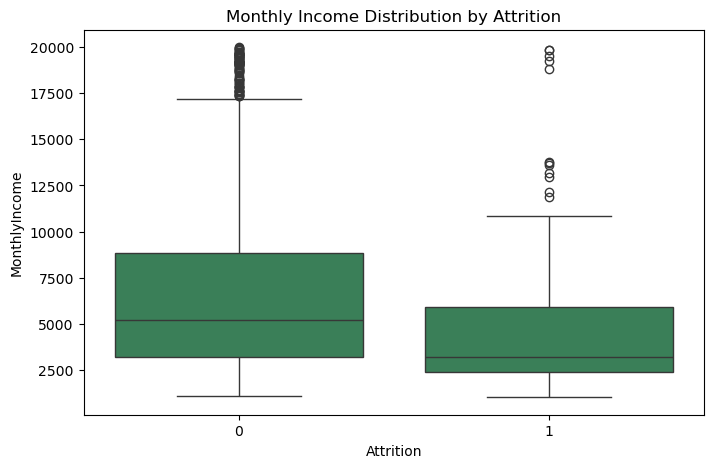

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, color='seagreen')
plt.title('Monthly Income Distribution by Attrition')
plt.show()

### **3. Data Cleaning and Preprocessing**

Drop columns that are irrelevant for modeling

In [20]:
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours'], inplace=True)

Convert categorical variables into numeric using Label Encoding

In [21]:
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



Normalize numerical features

In [22]:
numerical_columns = df.drop(columns=['Attrition']).select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Display cleaned dataset

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,-0.660531,0,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.254625,1,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,1.169781,1,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,1.169781,0,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,-1.575686,1,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


### **4. Train a Baseline Model**

Split into training and testing sets

In [24]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train is integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(y_train.unique())  
print(y_train.dtype)  


[0 1]
int32


In [25]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())  


Class distribution after SMOTE:
Attrition
0    978
1    978
Name: count, dtype: int64


* Train Decision Tree model

In [26]:
# Train the Decision Tree model on balanced data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Print accuracy
print("Decision Tree Accuracy after SMOTE:", accuracy_score(y_test, y_pred_dt))

# Print classification report
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy after SMOTE: 0.782312925170068
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       255
           1       0.27      0.38      0.32        39

    accuracy                           0.78       294
   macro avg       0.59      0.61      0.59       294
weighted avg       0.82      0.78      0.80       294



* Confusion Matrix for Decision Tree

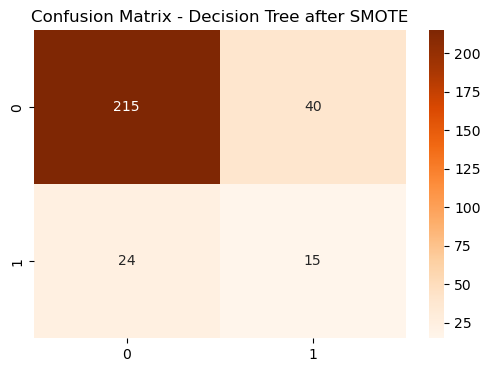

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree after SMOTE")
plt.show()

* Train Random Forest

In [28]:
# Train the Random Forest model on balanced data
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Print accuracy
print("Random Forest Accuracy after SMOTE:", accuracy_score(y_test, y_pred_rf))

# Print classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy after SMOTE: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.54      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.71      0.58      0.60       294
weighted avg       0.84      0.87      0.84       294



* Confusion Matrix for Random Forest

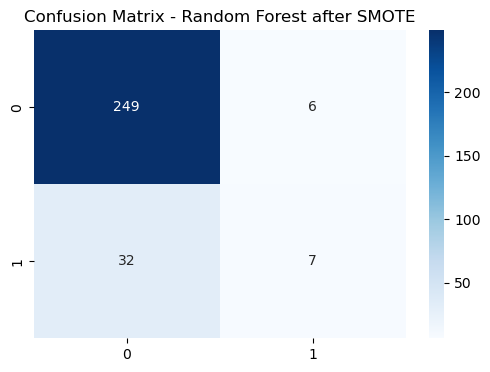

In [29]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest after SMOTE")
plt.show()

* Train Gradient Boosting Classifier

In [30]:
# Train Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_gbm = gbm_model.predict(X_test)

# Print accuracy
print("Gradient Boosting Classifier Accuracy after SMOTE:", accuracy_score(y_test, y_pred_gbm))

# Print classification report
print(classification_report(y_test, y_pred_gbm))

Gradient Boosting Classifier Accuracy after SMOTE: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.57      0.33      0.42        39

    accuracy                           0.88       294
   macro avg       0.73      0.65      0.68       294
weighted avg       0.86      0.88      0.86       294



* Confusion Matrix for Gradient Boosting Classifier

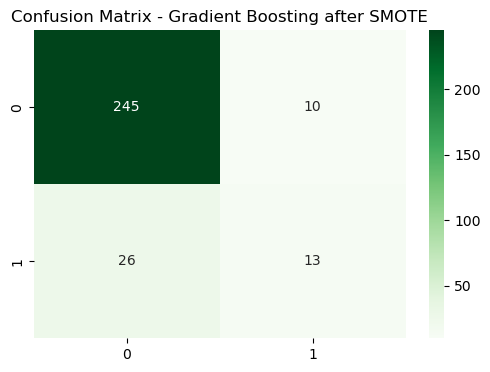

In [31]:
# Plot confusion matrix for Gradient Boosting Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gbm), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Gradient Boosting after SMOTE")
plt.show()

* Train XGBoost Classifier

In [32]:
# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Print accuracy
print("XGBoost Classifier Accuracy after SMOTE:", accuracy_score(y_test, y_pred_xgb))

# Print classification report
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Accuracy after SMOTE: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.60      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.86      0.88      0.86       294



* Confusion Matrix for XGBoost Classifier

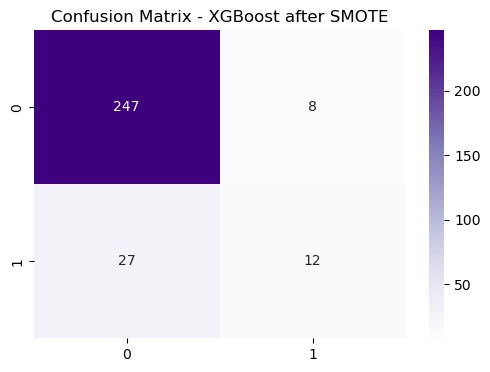

In [33]:
# Plot confusion matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - XGBoost after SMOTE")
plt.show()


* Train LightGBM Classifier

In [34]:
# Train LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Print accuracy
print("LightGBM Classifier Accuracy after SMOTE:", accuracy_score(y_test, y_pred_lgbm))

# Print classification report
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5171
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classifier Accuracy after SMOTE: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.26      0.35        39

    accuracy                           0.87       294
   macro avg       0.73      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



* Confusion Matrix for LightGBM

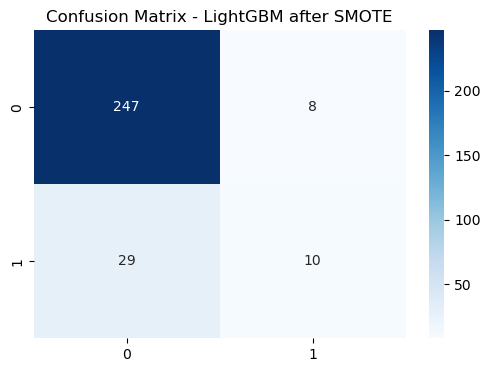

In [35]:
# Plot confusion matrix for LightGBM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LightGBM after SMOTE")
plt.show()


* Train Support Vector Machine

In [36]:
# Train Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Print accuracy
print("Support Vector Machine Accuracy after SMOTE:", accuracy_score(y_test, y_pred_svm))

# Print classification report
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy after SMOTE: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       255
           1       0.27      0.69      0.39        39

    accuracy                           0.71       294
   macro avg       0.61      0.70      0.60       294
weighted avg       0.85      0.71      0.76       294



* Confusion Matrix for Support Vector Machine

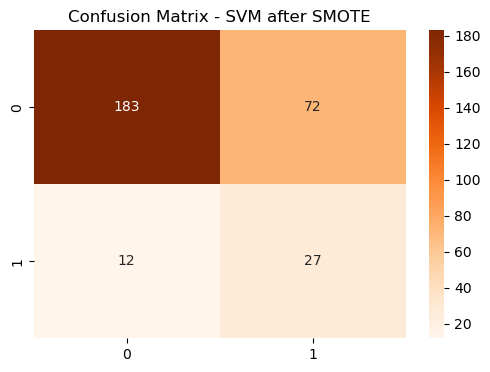

In [37]:
# Plot confusion matrix for Support Vector Machine
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - SVM after SMOTE")
plt.show()

* Train Logistic Regression

In [38]:
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Print accuracy
print("Logistic Regression Accuracy after SMOTE:", accuracy_score(y_test, y_pred_lr))

# Print classification report
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy after SMOTE: 0.7312925170068028
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       255
           1       0.28      0.67      0.40        39

    accuracy                           0.73       294
   macro avg       0.61      0.70      0.61       294
weighted avg       0.85      0.73      0.77       294



* Confusion Matrix for Logistic Regression

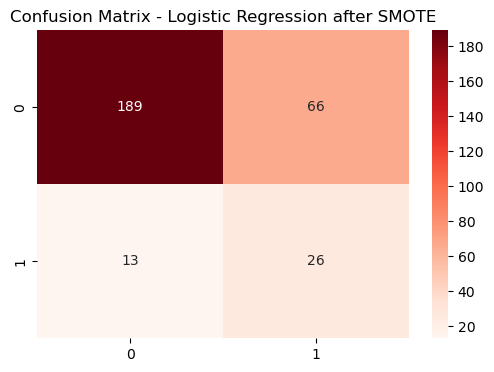

In [40]:

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Logistic Regression after SMOTE")
plt.show()

* The Models Result

In [ ]:
def get_recall_f1_scores(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    return recall, f1_score

# Collecting all metrics for each model
metrics = {
    "Decision Tree": [accuracy_score(y_test, y_pred_dt), *get_recall_f1_scores(y_test, y_pred_dt)],
    "Random Forest": [accuracy_score(y_test, y_pred_rf), *get_recall_f1_scores(y_test, y_pred_rf)],
    "Gradient Boosting": [accuracy_score(y_test, y_pred_gbm), *get_recall_f1_scores(y_test, y_pred_gbm)],
    "XGBoost": [accuracy_score(y_test, y_pred_xgb), *get_recall_f1_scores(y_test, y_pred_xgb)],
    "LightGBM": [accuracy_score(y_test, y_pred_lgbm), *get_recall_f1_scores(y_test, y_pred_lgbm)],
    "Support Vector Machine": [accuracy_score(y_test, y_pred_svm), *get_recall_f1_scores(y_test, y_pred_svm)],
    "Logistic Regression": [accuracy_score(y_test, y_pred_lr), *get_recall_f1_scores(y_test, y_pred_lr)]
}

# Convert dictionary to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Recall', 'F1 Score']).T

# Print the DataFrame
print(metrics_df)

                        Accuracy    Recall  F1 Score
Decision Tree           0.782313  0.384615  0.319149
Random Forest           0.870748  0.179487  0.269231
Gradient Boosting       0.877551  0.333333  0.419355
XGBoost                 0.880952  0.307692  0.406780
LightGBM                0.874150  0.256410  0.350877
Support Vector Machine  0.714286  0.692308  0.391304
Logistic Regression     0.731293  0.666667  0.396947
